# Wierda et al. 2021

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from ler.utils import get_param_from_json
# from scipy.stats import gaussian_kde

from ler.rates import LeR

### BBH

In [35]:
# initialize LeR
ler = LeR(
    npool=6,
    # SNR related
    sampling_frequency =  2048,
    waveform_approximant =  'IMRPhenomD',
    minimum_frequency =  20.0,
    snr_type =  'interpolation',
    ifos =  ['L1', 'H1', 'V1'],
    # GW related
    source_priors= {
        'merger_rate_density': 'merger_rate_density_bbh_popI_II_oguri2018', 
        'source_frame_masses': 'binary_masses_BBH_popI_II_powerlaw_gaussian', 
        'zs': 'sample_source_redshift', 
        'geocent_time': 'sampler_uniform', 
        'ra': 'sampler_uniform', 
        'dec': 'sampler_cosine', 
        'phase': 'sampler_uniform', 
        'psi': 'sampler_uniform', 
        'theta_jn': 'sampler_sine'
        },      
    source_priors_params= {
        'merger_rate_density': {'R0': 2.39e-08, 'b2': 1.6, 'b3': 2.1, 'b4': 30.}, 
        'source_frame_masses': {'mminbh': 4.59, 'mmaxbh': 86.22, 'alpha': 2.63, 'mu_g': 33.07, 'sigma_g': 5.69, 'lambda_peak': 0.10, 'delta_m': 4.82, 'beta': 1.26}, 
        'zs': None, 
        'geocent_time': {'min_': 1238166018, 'max_': 1269702018}, 
        'ra': {'min_': 0.0, 'max_': 6.283185307179586}, 
        'dec': None, 
        'phase': {'min_': 0.0, 'max_': 6.283185307179586}, 
        'psi': {'min_': 0.0, 'max_': 3.141592653589793}, 
        'theta_jn': None
        },
    spin_zero= True,
    spin_precession= False,
    # lens related
    lens_type =  'epl_galaxy',
    lens_functions =  {
        'strong_lensing_condition': 'rjs_with_cross_section_SIS', 
        'optical_depth': 'optical_depth_SIS_haris', 
        'param_sampler_type': 'sample_all_routine',
        },
    lens_priors =  {
        'source_redshift_sl': 'strongly_lensed_source_redshifts', 
        'lens_redshift': 'lens_redshift_SDSS_catalogue', 
        'velocity_dispersion': 'velocity_dispersion_gengamma', 
        'axis_ratio': 'axis_ratio_rayleigh', 
        'axis_rotation_angle': 'axis_rotation_angle_uniform', 
        'shear': 'shear_norm', 
        'mass_density_spectral_index': 'mass_density_spectral_index_normal', 
        'source_parameters': 'sample_gw_parameters',
        },
    lens_priors_params =  {
        'source_redshift_sl': None, 
        'lens_redshift': None, 
        'velocity_dispersion': {'a':2.32 / 2.67, 'c':2.67}, 
        'axis_ratio': {'q_min': 0.2, 'q_max': 1.0}, 
        'axis_rotation_angle': {'phi_min': 0.0, 'phi_max': 2*np.pi}, 
        'shear': {'scale': 0.05}, 
        'mass_density_spectral_index': {'mean': 2.0, 'std': 0.2}, 'source_parameters': None
    },
    # image related
    n_min_images =  2,
    n_max_images =  4,
    lens_model_list =  ['EPL_NUMBA', 'SHEAR'],
)


z_to_luminosity_distance interpolator will be loaded from ./interpolator_pickle/z_to_luminosity_distance/z_to_luminosity_distance_0.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_0.pickle
merger_rate_density interpolator will be loaded from ./interpolator_pickle/merger_rate_density/merger_rate_density_11.pickle
z_to_Dc interpolator will be loaded from ./interpolator_pickle/z_to_Dc/z_to_Dc_0.pickle
Dc_to_z interpolator will be loaded from ./interpolator_pickle/Dc_to_z/Dc_to_z_0.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_pickle/angular_diameter_distance/angular_diameter_distance_0.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_1.pickle
velocity_dispersion_gengamma interpolator will be loaded from ./interpolator_pickle/velocity_dispersion_gengamma/vel

In [36]:
# ler.batch_size = 100000 # for faster computation
ler.batch_size = 200000 # for faster computation
unlensed_param = ler.unlensed_cbc_statistics(size=1000000, resume=False, save_batch=False)

unlensed params will be store in ./ler_data/unlensed_param.json
chosen batch size = 200000 with total size = 1000000
There will be 5 batche(s)
Batch no. 1
sampling gw source params...
calculating snrs...
Batch no. 2
sampling gw source params...
calculating snrs...
Batch no. 3
sampling gw source params...
calculating snrs...
Batch no. 4
sampling gw source params...
calculating snrs...
Batch no. 5
sampling gw source params...
calculating snrs...
saving all unlensed_params in ./ler_data/unlensed_param.json 


In [5]:
_, unlensed_param_detectable = ler.unlensed_rate();

getting unlensed_params from json file ./ler_data/unlensed_param.json...
given detectability_condition == 'step_function'
total unlensed rate (yr^-1) (with step function): 829.2574996996017
number of simulated unlensed detectable events: 10085
number of all simulated unlensed events: 1000000
storing detectable unlensed params in ./ler_data/unlensed_param_detectable.json


In [41]:
lensed_param = ler.lensed_cbc_statistics(size=1000000, resume=True, save_batch=False)

lensed params will be store in ./ler_data/lensed_param.json
chosen batch size = 200000 with total size = 1000000
There will be 5 batche(s)
resuming from ./ler_data/lensed_param.json
saving all lensed_params in ./ler_data/lensed_param.json 


In [45]:
lensed_param = get_param_from_json('./ler_data/lensed_param_detectable.json')

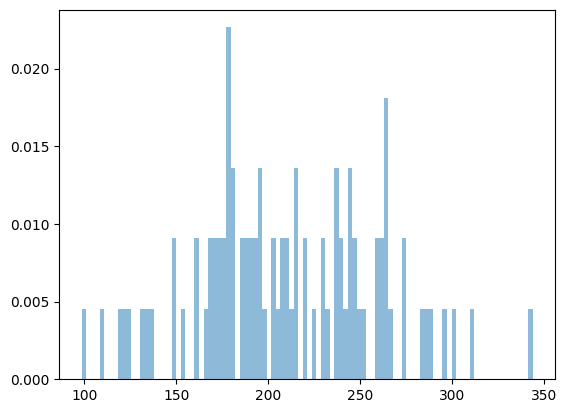

In [46]:
sigma = lensed_param['sigma']
plt.hist(sigma, bins=100, density=True, alpha=0.5, label='lensed')
plt.show()


In [3]:
_, lensed_param_detectable = ler.lensed_rate();

getting lensed_params from json file ./ler_data/lensed_param.json 
given detectability_condition == 'step_function'
total lensed rate (yr^-1) (with step function): 0.5110718901705553
number of simulated lensed detectable events: 7195
number of simulated all lensed events: 1000000
storing detectable lensed params in ./ler_data/lensed_param_detectable.json


In [6]:
ler.rate_ratio();

unlensed_rate: 829.2574996996017
lensed_rate: 0.5110718901705553
ratio: 1622.5848371798754


In [7]:
ler.available_gw_prior_list_and_its_params

{'merger_rate_density': {'merger_rate_density_bbh_popI_II_oguri2018': {'R0': 2.39e-08,
   'b2': 1.6,
   'b3': 2.0,
   'b4': 30},
  'star_formation_rate_madau_dickinson2014': {'af': 2.7, 'bf': 5.6, 'cf': 2.9},
  'merger_rate_density_bbh_popIII_ken2022': {'n0': 1.92e-08,
   'aIII': 0.66,
   'bIII': 0.3,
   'zIII': 11.6},
  'merger_rate_density_bbh_primordial_ken2022': {'n0': 4.4e-11,
   't0': 13.786885302009708}},
 'source_frame_masses': {'binary_masses_BBH_popI_II_powerlaw_gaussian': {'mminbh': 4.98,
   'mmaxbh': 112.5,
   'alpha': 3.78,
   'mu_g': 32.27,
   'sigma_g': 3.88,
   'lambda_peak': 0.03,
   'delta_m': 4.8,
   'beta': 0.81},
  'binary_masses_BBH_popIII_lognormal': {'Mc': 30.0,
   'sigma': 0.3,
   'beta': 1.1},
  'binary_masses_BBH_primordial_lognormal': {'Mc': 30.0,
   'sigma': 0.3,
   'beta': 1.1},
  'binary_masses_BNS_gwcosmo': {'mminns': 1.0, 'mmaxns': 3.0, 'alphans': 0.0},
  'binary_masses_BNS_bimodal': {'w': 0.643,
   'muL': 1.352,
   'sigmaL': 0.08,
   'muR': 1.88,
   's

## BNS

In [8]:
# initialize LeR
ler = LeR(
    npool=6,
    # SNR related
    sampling_frequency =  2048,
    waveform_approximant =  'IMRPhenomD',
    minimum_frequency =  20.0,
    snr_type =  'interpolation',
    ifos =  ['L1', 'H1', 'V1'],
    # GW related
    source_priors= {
        'merger_rate_density': 'merger_rate_density_bbh_popI_II_oguri2018', 
        'source_frame_masses': 'binary_masses_uniform', 
        'zs': 'sample_source_redshift', 
        'geocent_time': 'sampler_uniform', 
        'ra': 'sampler_uniform', 
        'dec': 'sampler_cosine', 
        'phase': 'sampler_uniform', 
        'psi': 'sampler_uniform', 
        'theta_jn': 'sampler_sine'
        },      
    source_priors_params= {
        'merger_rate_density': {'R0': 105.5e-09, 'b2': 1.6, 'b3': 2.1, 'b4': 30.}, 
        'source_frame_masses': {'m_min': 1, 'm_max': 3}, 
        'zs': None, 
        'geocent_time': {'min_': 1238166018, 'max_': 1269702018}, 
        'ra': {'min_': 0.0, 'max_': 6.283185307179586}, 
        'dec': None, 
        'phase': {'min_': 0.0, 'max_': 6.283185307179586}, 
        'psi': {'min_': 0.0, 'max_': 3.141592653589793}, 
        'theta_jn': None
        },
    spin_zero= True,
    spin_precession= False,
    # lens related
    lens_type =  'epl_galaxy',
    lens_functions =  {
        'strong_lensing_condition': 'rjs_with_cross_section_SIS', 
        'optical_depth': 'optical_depth_SIS_haris', 
        'param_sampler_type': 'sample_all_routine',
        },
    lens_priors =  {
        'source_redshift_sl': 'strongly_lensed_source_redshifts', 
        'lens_redshift': 'lens_redshift_SDSS_catalogue', 
        'velocity_dispersion': 'velocity_dispersion_gengamma', 
        'axis_ratio': 'axis_ratio_rayleigh', 
        'axis_rotation_angle': 'axis_rotation_angle_uniform', 
        'shear': 'shear_norm', 
        'mass_density_spectral_index': 'mass_density_spectral_index_normal', 
        'source_parameters': 'sample_gw_parameters',
        },
    lens_priors_params =  {
        'source_redshift_sl': None, 
        'lens_redshift': None, 
        'velocity_dispersion': {'a':2.32 / 2.67, 'c':2.67}, 
        'axis_ratio': {'q_min': 0.2, 'q_max': 1.0}, 
        'axis_rotation_angle': {'phi_min': 0.0, 'phi_max': 2*np.pi}, 
        'shear': {'scale': 0.05}, 
        'mass_density_spectral_index': {'mean': 2.0, 'std': 0.2}, 'source_parameters': None
    },
    # image related
    n_min_images =  2,
    n_max_images =  4,
    lens_model_list =  ['EPL_NUMBA', 'SHEAR'],
)

z_to_luminosity_distance interpolator will be loaded from ./interpolator_pickle/z_to_luminosity_distance/z_to_luminosity_distance_0.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_0.pickle
merger_rate_density interpolator will be generated at ./interpolator_pickle/merger_rate_density/merger_rate_density_12.pickle
z_to_Dc interpolator will be loaded from ./interpolator_pickle/z_to_Dc/z_to_Dc_0.pickle
Dc_to_z interpolator will be loaded from ./interpolator_pickle/Dc_to_z/Dc_to_z_0.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_pickle/angular_diameter_distance/angular_diameter_distance_0.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_1.pickle
velocity_dispersion_gengamma interpolator will be loaded from ./interpolator_pickle/velocity_dispersion_gengamma/ve

In [11]:
# ler.batch_size = 100000 # for faster computation
ler.batch_size = 200000 # for faster computation
unlensed_param = ler.unlensed_cbc_statistics(size=1000000, resume=False, save_batch=False, output_jsonfile='unlensed_param_bns.json')

unlensed params will be store in ./ler_data/unlensed_param_bns.json
chosen batch size = 200000 with total size = 1000000
There will be 5 batche(s)
Batch no. 1
sampling gw source params...
calculating snrs...
Batch no. 2
sampling gw source params...
calculating snrs...
Batch no. 3
sampling gw source params...
calculating snrs...
Batch no. 4
sampling gw source params...
calculating snrs...
Batch no. 5
sampling gw source params...
calculating snrs...
saving all unlensed_params in ./ler_data/unlensed_param_bns.json 


In [12]:
lensed_param = ler.lensed_cbc_statistics(size=1000000, resume=False, save_batch=False, output_jsonfile='lensed_param_bns.json')

lensed params will be store in ./ler_data/lensed_param_bns.json
chosen batch size = 200000 with total size = 1000000
There will be 5 batche(s)
Batch no. 1
sampling lensed params...
solving lens equations...


100%|█████████████████████████████████████████████████████| 200000/200000 [00:50<00:00, 3957.60it/s]


Invalid sample found. Resampling 7 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  1.91it/s]


calculating snrs...
Batch no. 2
sampling lensed params...
solving lens equations...


100%|█████████████████████████████████████████████████████| 200000/200000 [00:50<00:00, 3998.46it/s]


Invalid sample found. Resampling 4 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.18it/s]


calculating snrs...
Batch no. 3
sampling lensed params...
solving lens equations...


100%|█████████████████████████████████████████████████████| 200000/200000 [00:49<00:00, 4001.35it/s]


Invalid sample found. Resampling 6 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.67it/s]


calculating snrs...
Batch no. 4
sampling lensed params...
solving lens equations...


100%|█████████████████████████████████████████████████████| 200000/200000 [00:50<00:00, 3938.33it/s]


Invalid sample found. Resampling 3 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.17s/it]


calculating snrs...
Batch no. 5
sampling lensed params...
solving lens equations...


100%|█████████████████████████████████████████████████████| 200000/200000 [00:50<00:00, 3951.03it/s]


Invalid sample found. Resampling 8 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.18it/s]


calculating snrs...
saving all lensed_params in ./ler_data/lensed_param_bns.json 


In [14]:
ler.rate_comparision_with_rate_calculation();

getting unlensed_params from json file ./ler_data/unlensed_param_bns.json...
given detectability_condition == 'step_function'
total unlensed rate (yr^-1) (with step function): 23.229937323427478
number of simulated unlensed detectable events: 64
number of all simulated unlensed events: 1000000
storing detectable unlensed params in ./ler_data/unlensed_param_detectable.json
getting lensed_params from json file ./ler_data/lensed_param_bns.json 
given detectability_condition == 'step_function'
total lensed rate (yr^-1) (with step function): 0.028219431771653505
number of simulated lensed detectable events: 90
number of simulated all lensed events: 1000000
storing detectable lensed params in ./ler_data/lensed_param_detectable.json
unlensed_rate (per year): 23.229937323427478
lensed_rate (per year): 0.028219431771653505
ratio: 823.1894076181227


## High magnification check

In [33]:
import json

In [48]:
ler = LeR(
    npool=6,
    verbose=False,
    event_type='BNS',
)

In [118]:
## choose magnification > 100.
mu = get_param_from_json('mu.json')
mu1 = list(mu['mu1'])
mu2 = list(mu['mu2'])
mu3 = list(mu['mu3'])
mu4 = list(mu['mu4'])
sample_size = 0
print(f"Current number of samples: {len(mu1)}\n")


ler.batch_size = 200000 # for faster computation
while len(mu1) < 1000:
    lensed_param = ler.lensed_cbc_statistics(size=200000, resume=False, save_batch=False, output_jsonfile='lensed_param_bns_test.json')
    mu = abs(lensed_param['magnifications'])
    # nan to 0
    mu1_ = np.nan_to_num(mu[:,0])
    mu2_ = np.nan_to_num(mu[:,1])
    mu3_ = np.nan_to_num(mu[:,2])
    mu4_ = np.nan_to_num(mu[:,3])
    

    mu1.extend(mu1_[mu1_>100])
    mu2.extend(mu2_[mu2_>100])
    mu3.extend(mu3_[mu3_>100])
    mu4.extend(mu4_[mu4_>100])

    # save json file
    dict_mu = {
        'mu1': mu1,
        'mu2': mu2,
        'mu3': mu3,
        'mu4': mu4,
    }
    with open('mu.json', 'w') as f:
        json.dump(dict_mu, f)

    print(f"\nCurrent number of samples: {len(mu1)}")
    sample_size += 200000
    print(f"Current sample size: {sample_size}\n")

Current number of samples: 347

lensed params will be store in ./ler_data/lensed_param_bns_test.json
chosen batch size = 200000 with total size = 200000
There will be 1 batche(s)
Batch no. 1
sampling lensed params...
solving lens equations...


100%|█████████████████████████████████████████████████████| 200000/200000 [00:50<00:00, 3973.68it/s]


Invalid sample found. Resampling 8 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.40it/s]


calculating snrs...
saving all lensed_params in ./ler_data/lensed_param_bns_test.json 

Current number of samples: 359
Current sample size: 200000

lensed params will be store in ./ler_data/lensed_param_bns_test.json
chosen batch size = 200000 with total size = 200000
There will be 1 batche(s)
Batch no. 1
sampling lensed params...
solving lens equations...


100%|█████████████████████████████████████████████████████| 200000/200000 [02:02<00:00, 1638.80it/s]


Invalid sample found. Resampling 3 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████| 3/3 [1:00:48<00:00, 1216.30s/it]


calculating snrs...
saving all lensed_params in ./ler_data/lensed_param_bns_test.json 

Current number of samples: 375
Current sample size: 400000

lensed params will be store in ./ler_data/lensed_param_bns_test.json
chosen batch size = 200000 with total size = 200000
There will be 1 batche(s)
Batch no. 1
sampling lensed params...
solving lens equations...


100%|█████████████████████████████████████████████████████| 200000/200000 [2:01:49<00:00, 27.36it/s]


Invalid sample found. Resampling 4 lensed events...
solving lens equations...


100%|██████████████████████████████████████████████████████████████| 4/4 [1:00:55<00:00, 913.97s/it]


calculating snrs...
saving all lensed_params in ./ler_data/lensed_param_bns_test.json 

Current number of samples: 392
Current sample size: 600000

lensed params will be store in ./ler_data/lensed_param_bns_test.json
chosen batch size = 200000 with total size = 200000
There will be 1 batche(s)
Batch no. 1
sampling lensed params...
solving lens equations...


100%|█████████████████████████████████████████████████████| 200000/200000 [00:48<00:00, 4127.38it/s]


Invalid sample found. Resampling 7 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  1.93it/s]


calculating snrs...
saving all lensed_params in ./ler_data/lensed_param_bns_test.json 

Current number of samples: 413
Current sample size: 800000

lensed params will be store in ./ler_data/lensed_param_bns_test.json
chosen batch size = 200000 with total size = 200000
There will be 1 batche(s)
Batch no. 1
sampling lensed params...
solving lens equations...


100%|█████████████████████████████████████████████████████| 200000/200000 [1:47:12<00:00, 31.09it/s]


Invalid sample found. Resampling 5 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.49it/s]


calculating snrs...
saving all lensed_params in ./ler_data/lensed_param_bns_test.json 

Current number of samples: 435
Current sample size: 1000000

lensed params will be store in ./ler_data/lensed_param_bns_test.json
chosen batch size = 200000 with total size = 200000
There will be 1 batche(s)
Batch no. 1
sampling lensed params...
solving lens equations...


100%|█████████████████████████████████████████████████████| 200000/200000 [1:47:55<00:00, 30.89it/s]


Invalid sample found. Resampling 4 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.07it/s]


calculating snrs...
saving all lensed_params in ./ler_data/lensed_param_bns_test.json 

Current number of samples: 448
Current sample size: 1200000

lensed params will be store in ./ler_data/lensed_param_bns_test.json
chosen batch size = 200000 with total size = 200000
There will be 1 batche(s)
Batch no. 1
sampling lensed params...
solving lens equations...


100%|█████████████████████████████████████████████████████| 200000/200000 [01:00<00:00, 3306.02it/s]


Invalid sample found. Resampling 1 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:34<00:00, 34.59s/it]


calculating snrs...
saving all lensed_params in ./ler_data/lensed_param_bns_test.json 

Current number of samples: 463
Current sample size: 1400000

lensed params will be store in ./ler_data/lensed_param_bns_test.json
chosen batch size = 200000 with total size = 200000
There will be 1 batche(s)
Batch no. 1
sampling lensed params...
solving lens equations...


100%|██████████████████████████████████████████████████████| 200000/200000 [09:03<00:00, 367.97it/s]


Invalid sample found. Resampling 3 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.05s/it]


calculating snrs...
saving all lensed_params in ./ler_data/lensed_param_bns_test.json 

Current number of samples: 483
Current sample size: 1600000

lensed params will be store in ./ler_data/lensed_param_bns_test.json
chosen batch size = 200000 with total size = 200000
There will be 1 batche(s)
Batch no. 1
sampling lensed params...
solving lens equations...


100%|██████████████████████████████████████████████████████| 200000/200000 [20:24<00:00, 163.31it/s]


Invalid sample found. Resampling 3 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.20s/it]


calculating snrs...
saving all lensed_params in ./ler_data/lensed_param_bns_test.json 

Current number of samples: 502
Current sample size: 1800000

lensed params will be store in ./ler_data/lensed_param_bns_test.json
chosen batch size = 200000 with total size = 200000
There will be 1 batche(s)
Batch no. 1
sampling lensed params...
solving lens equations...


100%|█████████████████████████████████████████████████████| 200000/200000 [00:52<00:00, 3791.60it/s]


Invalid sample found. Resampling 8 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.09it/s]


calculating snrs...
saving all lensed_params in ./ler_data/lensed_param_bns_test.json 

Current number of samples: 527
Current sample size: 2000000

lensed params will be store in ./ler_data/lensed_param_bns_test.json
chosen batch size = 200000 with total size = 200000
There will be 1 batche(s)
Batch no. 1
sampling lensed params...
solving lens equations...


100%|█████████████████████████████████████████████████████| 200000/200000 [00:51<00:00, 3885.20it/s]


Invalid sample found. Resampling 5 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.32it/s]


calculating snrs...
saving all lensed_params in ./ler_data/lensed_param_bns_test.json 

Current number of samples: 545
Current sample size: 2200000

lensed params will be store in ./ler_data/lensed_param_bns_test.json
chosen batch size = 200000 with total size = 200000
There will be 1 batche(s)
Batch no. 1
sampling lensed params...
solving lens equations...


100%|█████████████████████████████████████████████████████| 200000/200000 [00:50<00:00, 3995.88it/s]


Invalid sample found. Resampling 5 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.31it/s]


calculating snrs...
saving all lensed_params in ./ler_data/lensed_param_bns_test.json 

Current number of samples: 557
Current sample size: 2400000

lensed params will be store in ./ler_data/lensed_param_bns_test.json
chosen batch size = 200000 with total size = 200000
There will be 1 batche(s)
Batch no. 1
sampling lensed params...
solving lens equations...


100%|█████████████████████████████████████████████████████| 200000/200000 [00:49<00:00, 4007.07it/s]


Invalid sample found. Resampling 3 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.09s/it]


calculating snrs...
saving all lensed_params in ./ler_data/lensed_param_bns_test.json 

Current number of samples: 577
Current sample size: 2600000

lensed params will be store in ./ler_data/lensed_param_bns_test.json
chosen batch size = 200000 with total size = 200000
There will be 1 batche(s)
Batch no. 1
sampling lensed params...
solving lens equations...


100%|█████████████████████████████████████████████████████| 200000/200000 [00:50<00:00, 3998.69it/s]


Invalid sample found. Resampling 4 lensed events...
solving lens equations...


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.21it/s]


calculating snrs...
saving all lensed_params in ./ler_data/lensed_param_bns_test.json 


KeyboardInterrupt: 

In [86]:
mu = get_param_from_json('mu.json')
mu1 = list(mu['mu1'])
mu2 = list(mu['mu2'])
mu3 = list(mu['mu3'])
mu4 = list(mu['mu4'])
mu = np.array(mu1+mu2+mu3+mu4)
mu = mu[mu<10000]
log10_mu = np.log10(mu)

# mu^-3
log10_mu_ = np.linspace(2, 3, 100)
mu_ = 10**log10_mu_
pdf_mu = np.log10(mu_**(-3))+8

In [87]:
# integrate pdf_mu to find normalization constant
# from scipy.integrate import simps
# norm = simps(10**pdf_mu, mu_)

# pdf_mu = pdf_mu - np.log10(norm)

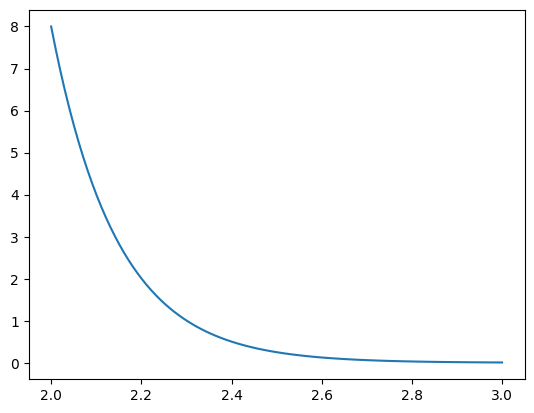

In [101]:
log10_mu_ = np.linspace(2, 3, 100)
mu_ = 10**log10_mu_
plt.plot(log10_mu_, 8*mu_**-3*10**6, label=r'$\mu^{-3}$')
plt.show()

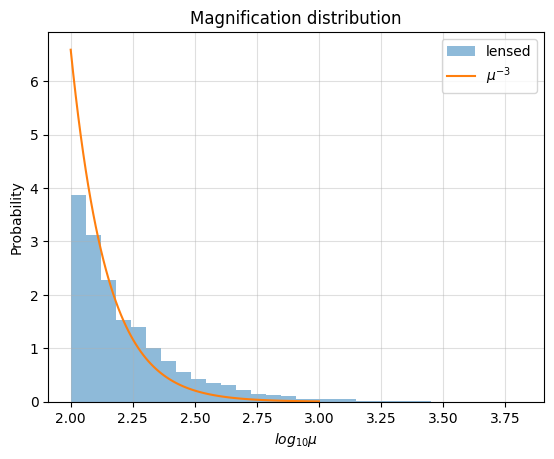

In [117]:
plt.hist(log10_mu, bins=30, density=True, alpha=0.5, label='lensed')
log10_mu_ = np.linspace(2, 3, 100)
mu_ = 10**log10_mu_
plt.plot(log10_mu_, 8*mu_**-3*7**7, label=r'$\mu^{-3}$')
plt.xlabel(r'$log_{10}\mu$')
plt.ylabel('Probability')
plt.title('Magnification distribution')
plt.legend()
plt.grid(alpha=0.4)
plt.show()
